# Исследование объявлений о продаже квартир

## Описание задачи

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области за несколько лет. 

Данные содержат различные параметры объявлений о продаже недвижимости: цена предложения, габариты квартиры/отдельных помещений, характеристики дома, этаж и этажность, расположение и расстояние до ключевых инфраструктурных объектов (крупного города, парка, магазина и т.д.)

## Детальное описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Что мы можем сделать с этими данными и чем они полезны бизнесу?

* Данные по объявлениям помогают нам принимать решения о покупке квартиры в различных целях: для проживания или инвестиции
* Данные по объявлениям помогают бизнесу оценивать проекты в сфере недвижимости
* Сервисам по объялениям данные помогают оценивать рыночное состояние рынка недвижимости и предотвращать мошенничество
* Для дата-саентистов данные помогают строить передективные модели и понимать тенденции развития рынка

## Постановка задачи

* Провести обзор рынка недвижимости и первичную обработку данных
* Найти среднюю стоиомость квадратного метра жилья (любой другой расчетный параметр)
* Установить зависимость между ценой квадратного метра и расстоянием до центра (любые ваши параметры)
* Построить графики, отражающие данные о рынке недвижимости (любые ваши идеи и предложения)
* Принять решение: стоит ли приобретать/продавать объект недвижимости

## Шаги по достижению цели

* Откройте файл с данными и изучите общую информацию
* Выполните предобработку данных
* Проведите исследовательский анализ данных
* Напишите общий вывод по исследованию

# Ход решения задачи

## Шаг 0. Подготовка к работе

Выгрузим библиотеки, которые нам понадобятся в работе

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandasql import sqldf
import math

## Шаг 1. Получение данных из источника

Прочитаем файл:

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Посмотрим, как у нас получилось загрузить данные:

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Оставим только те признаки, которые хотим проанализировать:

In [4]:
df = df[['last_price','total_area','first_day_exposition','rooms','ceiling_height','floors_total',\
          'floor','kitchen_area','balcony','locality_name','days_exposition','cityCenters_nearest']]
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,cityCenters_nearest
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,8,25.0,NaN,Санкт-Петербург,NaN,16028.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,1,11.0,2.0,посёлок Шушары,81.0,18603.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,4,8.3,0.0,Санкт-Петербург,558.0,13933.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,9,NaN,0.0,Санкт-Петербург,424.0,6800.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,13,41.0,NaN,Санкт-Петербург,121.0,8098.0


Выведем информацию о фрейме данных:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   floor                 23699 non-null  int64  
 7   kitchen_area          21421 non-null  float64
 8   balcony               12180 non-null  float64
 9   locality_name         23650 non-null  object 
 10  days_exposition       20518 non-null  float64
 11  cityCenters_nearest   18180 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.2+ MB


Посмотрим все колонки этой таблицы:

In [6]:
df.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'floor', 'kitchen_area', 'balcony',
       'locality_name', 'days_exposition', 'cityCenters_nearest'],
      dtype='object')

Проверим, сколько строк по каждой колонке заполнены пустыми значениями:

In [7]:
df.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
floor                       0
kitchen_area             2278
balcony                 11519
locality_name              49
days_exposition          3181
cityCenters_nearest      5519
dtype: int64

### ВЫВОДЫ

* В данных 23699 записи. 
* Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных.
* Данные признаны полными и достаточными для исследования.

## Шаг 2. Предобработка данных

#### Что мы можем сделать на этом этапе?

* Проверить дублирующие значения
* Повысить заполняемость признаков объектов недвижимости
* Изменить типы данных на требуемые нам
* Переименовать столбцы в удобные и короткие названия
* Убрать "битые" данные

Помните, что данные - это данность и мы их не можем "выдумать". Это критичное замечание влияет на все результаты исследований

Переименуем колонку ближайшего города:

In [9]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )
df.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,8,25.0,NaN,Санкт-Петербург,NaN,16028.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,1,11.0,2.0,посёлок Шушары,81.0,18603.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,4,8.3,0.0,Санкт-Петербург,558.0,13933.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,9,NaN,0.0,Санкт-Петербург,424.0,6800.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,13,41.0,NaN,Санкт-Петербург,121.0,8098.0


Переведем тип данных по дням размещения объявления к типу дата:

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,8,25.0,NaN,Санкт-Петербург,NaN,16028.0
1,3350000.0,40.4,2018-12-04,1,NaN,11.0,1,11.0,2.0,посёлок Шушары,81.0,18603.0
2,5196000.0,56.0,2015-08-20,2,NaN,5.0,4,8.3,0.0,Санкт-Петербург,558.0,13933.0
3,64900000.0,159.0,2015-07-24,3,NaN,14.0,9,NaN,0.0,Санкт-Петербург,424.0,6800.0
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,13,41.0,NaN,Санкт-Петербург,121.0,8098.0


Аналогично, тип данных у признака "число этажаей в здании" также должен быть целым числом, а не вещественным как это есть сейчас. Исправим эту неточность:

In [12]:
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype(int)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,NaN,Санкт-Петербург,NaN,16028.0
1,3350000.0,40.4,2018-12-04,1,NaN,11,1,11.0,2.0,посёлок Шушары,81.0,18603.0
2,5196000.0,56.0,2015-08-20,2,NaN,5,4,8.3,0.0,Санкт-Петербург,558.0,13933.0
3,64900000.0,159.0,2015-07-24,3,NaN,14,9,NaN,0.0,Санкт-Петербург,424.0,6800.0
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,NaN,Санкт-Петербург,121.0,8098.0


Переведем расстояние до ближайшего города из метров в километры и сохраним в той же колонке:

In [13]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000
df['city_centers_nearest'].round(2)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,NaN,Санкт-Петербург,NaN,16.028
1,3350000.0,40.4,2018-12-04,1,NaN,11,1,11.0,2.0,посёлок Шушары,81.0,18.603
2,5196000.0,56.0,2015-08-20,2,NaN,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933
3,64900000.0,159.0,2015-07-24,3,NaN,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,NaN,Санкт-Петербург,121.0,8.098


Округлим общую площадь объектов до 2 знаков после запятой:

In [14]:
df['total_area'].round(2)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,NaN,Санкт-Петербург,NaN,16.028
1,3350000.0,40.4,2018-12-04,1,NaN,11,1,11.0,2.0,посёлок Шушары,81.0,18.603
2,5196000.0,56.0,2015-08-20,2,NaN,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933
3,64900000.0,159.0,2015-07-24,3,NaN,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,NaN,Санкт-Петербург,121.0,8.098


Заменим пустые значения высоты потолоков усредненным значением по всем объектам:

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,NaN,Санкт-Петербург,NaN,16.028
1,3350000.0,40.4,2018-12-04,1,2.65,11,1,11.0,2.0,посёлок Шушары,81.0,18.603
2,5196000.0,56.0,2015-08-20,2,2.65,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933
3,64900000.0,159.0,2015-07-24,3,2.65,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,NaN,Санкт-Петербург,121.0,8.098


Заменим этажность домов усредненным значением по всем объектам:

In [16]:
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return df[df['floor'] == row['floor']]['floors_total'].median()
        
df['f'] = df.apply(floors_total, axis=1) 
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'] = (df['f'] + df['floors_total']).astype('int')
df.drop('f', axis= 1 , inplace= True )
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52, 37])

Посчитаем дубли в датасете:

In [17]:
df.duplicated().sum()

0

Если бы в датасете были дубли, мы бы их могли убрать простой командой:

In [18]:
df.drop_duplicates()
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,NaN,Санкт-Петербург,NaN,16.028
1,3350000.0,40.4,2018-12-04,1,2.65,11,1,11.0,2.0,посёлок Шушары,81.0,18.603
2,5196000.0,56.0,2015-08-20,2,2.65,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933
3,64900000.0,159.0,2015-07-24,3,2.65,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,NaN,Санкт-Петербург,121.0,8.098


Заполним пустоты в данных о наличии балконов нулевыми значениями:

In [19]:
df['balcony'] = df['balcony'].fillna(0)

Посчитаем, какая доля объявлений имеет незаполненную локацию. Доля таких строчек стала нулевой.

In [20]:
(df['locality_name'].isna().sum() / df.shape[0]).round(4)

0.0021

Заполним пропущенные названия населенных пунктов:

In [ ]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Мы могли бы также удалить объявления с пустыми локациями объектов:

In [22]:
df = df.dropna(subset=['locality_name'])
df.tail()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
23694,9700000.0,133.81,2017-03-21,3,3.70,5,3,13.83,0.0,Санкт-Петербург,NaN,4.232
23695,3100000.0,59.00,2018-01-15,3,2.65,5,4,8.50,0.0,Тосно,45.0,NaN
23696,2500000.0,56.70,2018-02-11,2,2.65,3,1,NaN,0.0,село Рождествено,NaN,NaN
23697,11475000.0,76.75,2017-03-28,2,3.00,17,12,23.30,2.0,Санкт-Петербург,602.0,10.364
23698,1350000.0,32.30,2017-07-21,1,2.50,5,1,9.00,0.0,поселок Новый Учхоз,NaN,NaN


В качестве эксперимента мы можем придумать и более сложную логику для доопределения недостающих данных. Например, посчитать среднюю высоту объектов в домах различной высотности и заполнить пустые параметры высоты потолков:

In [23]:
ceiling_height_median = df.groupby('floor')['ceiling_height'].transform('median')
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mode())

df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,0.0,Санкт-Петербург,NaN,16.028
1,3350000.0,40.4,2018-12-04,1,2.65,11,1,11.0,2.0,посёлок Шушары,81.0,18.603
2,5196000.0,56.0,2015-08-20,2,2.65,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933
3,64900000.0,159.0,2015-07-24,3,2.65,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,0.0,Санкт-Петербург,121.0,8.098


Или вот еще вариант. Можем рассчитать недостающий данные по площади кухонь,у среднив значения по аналогам в разрезе общей площади и количества комнат:

In [ ]:
kitchen_height_median = df.groupby(['total_area','rooms'])['kitchen_area'].transform('median')
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_height_median)
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mode())

df.head()

## ВЫВОД:
* Убрали дупликаты из таблицы (сначала проверили, что их нет, и на всякий случай удалили)
* Сделали преобразования типов данных (перевели метры в километры, превратили вещественные числа в целые)
* Улучшили заполнение некоторых признаков (заполнили пустоты по числу балконов, усреднили площади кухонь и высотности квартир)
* Убрали битые данные (строки, где не была заполнена локация)

## Шаг 3. Начнем анализировать данные по недвижимости

### Что происхдит на этом этапе?

* Вычисляем необходимые параметры
* Строим репрезентативные графики
* Выявляем тендеции и закономерности
* Проводим анализ зависимости параметров друг от друга 

Опционально:
* Смторим на данные с различных разрезах
* Ставим эксперименты и выдивигаем гипотезы

Добавим новые вспомогательные полонки в датасет, отражающие год, месяц и неделю, основываясь на дате размещения объявления:

In [24]:
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  float64       
 1   total_area            23650 non-null  float64       
 2   first_day_exposition  23650 non-null  datetime64[ns]
 3   rooms                 23650 non-null  int64         
 4   ceiling_height        23650 non-null  float64       
 5   floors_total          23650 non-null  int32         
 6   floor                 23650 non-null  int64         
 7   kitchen_area          21381 non-null  float64       
 8   balcony               23650 non-null  float64       
 9   locality_name         23650 non-null  object        
 10  days_exposition       20470 non-null  float64       
 11  city_centers_nearest  18139 non-null  float64       
 12  week_day              23650 non-null  int32         
 13  year                 

Посмотрим уникальные даты размещения объявлений:

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

<DatetimeArray>
['2019-03-07 00:00:00', '2018-12-04 00:00:00', '2015-08-20 00:00:00',
 '2015-07-24 00:00:00', '2018-06-19 00:00:00', '2018-09-10 00:00:00',
 '2017-11-02 00:00:00', '2019-04-18 00:00:00', '2018-05-23 00:00:00',
 '2017-02-26 00:00:00',
 ...
 '2015-11-15 00:00:00', '2015-04-21 00:00:00', '2015-04-04 00:00:00',
 '2015-01-06 00:00:00', '2015-06-13 00:00:00', '2016-10-30 00:00:00',
 '2015-03-27 00:00:00', '2014-12-29 00:00:00', '2016-09-12 00:00:00',
 '2015-07-19 00:00:00']
Length: 1491, dtype: datetime64[ns]

### Анализ цены за квадратный метр жилья

Добавим столбец price_square_meter с ценой одного квадратного метра объекта с точностью до двух знаков после запятой:

In [26]:
df['price_on_metr'] = (df['last_price'] / df['total_area']).round(2).astype(int)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest,week_day,year,month,price_on_metr
0,13000000.0,108.0,2019-03-07,3,2.70,16,8,25.0,0.0,Санкт-Петербург,NaN,16.028,3,2019,3,120370
1,3350000.0,40.4,2018-12-04,1,2.65,11,1,11.0,2.0,посёлок Шушары,81.0,18.603,1,2018,12,82920
2,5196000.0,56.0,2015-08-20,2,2.65,5,4,8.3,0.0,Санкт-Петербург,558.0,13.933,3,2015,8,92785
3,64900000.0,159.0,2015-07-24,3,2.65,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800,4,2015,7,408176
4,10000000.0,100.0,2018-06-19,2,3.03,14,13,41.0,0.0,Санкт-Петербург,121.0,8.098,1,2018,6,100000


Также можем посмотреть цены на квадратный метр отдельно по Санкт-Петербургу и Ленинградской области:

In [28]:
df_piter = df.query('locality_name == "Санкт-Петербург"')
df_len_obl = df.query('locality_name != "Санкт-Петербург"')

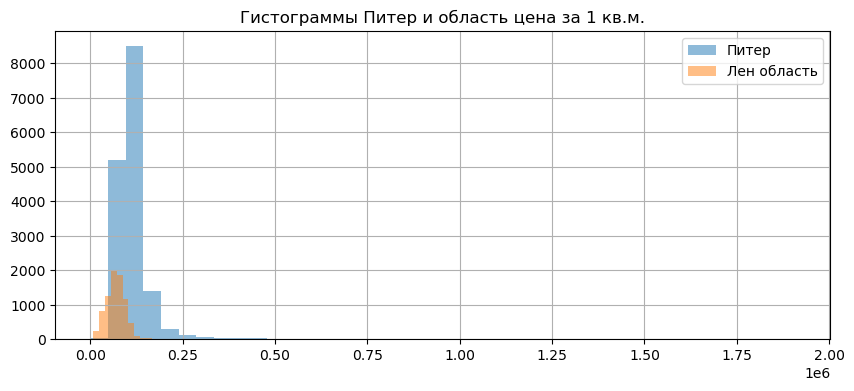

In [29]:
df_piter['price_on_metr'].hist(figsize=(10,4), bins=40, alpha=0.5)
df_len_obl['price_on_metr'].hist(figsize=(10,4), bins=40, alpha=0.5)
plt.legend(['Питер', 'Лен область'])
plt.title('Гистограммы Питер и область цена за 1 кв.м.')
plt.show()

In [30]:
df_piter['price_on_metr'].mean()

114848.56764836842

In [31]:
df_len_obl['price_on_metr'].mean()

68864.65102787237

#### Вывод:
Цены в Санкт-Петербурге ожидаемо выше, чем в Ленинградской области

### Анализ общей площади объектов

In [32]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Оставим значения от минимального 12 до 100 кв. метров построим гистограмму

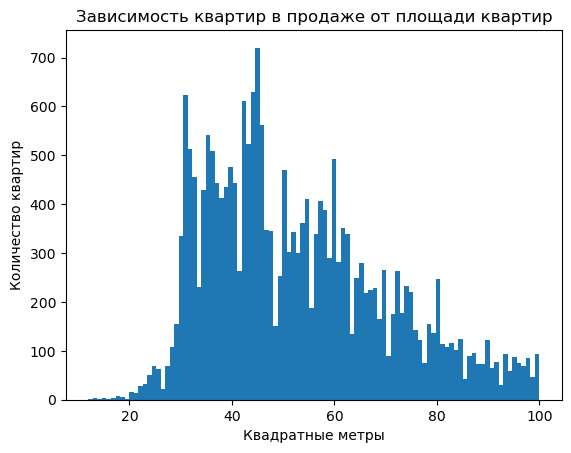

In [33]:
plt.hist(df['total_area'], bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

#### ВЫВОД: 
На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

### Анализ локаций

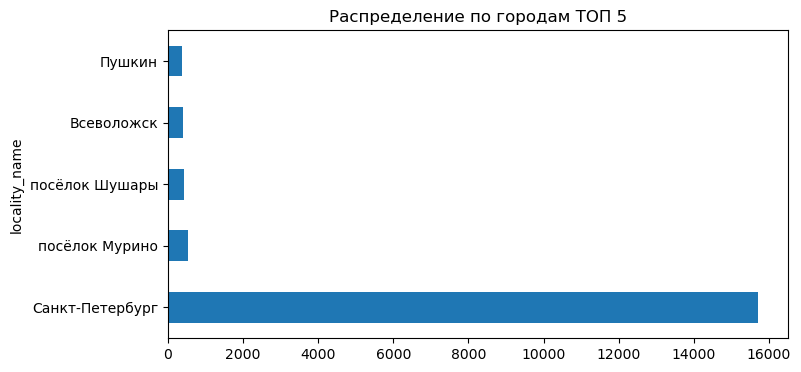

In [34]:
df['locality_name'].value_counts().head(5).plot(kind = 'barh',figsize=(8,4))
plt.title('Распределение по городам ТОП 5')
plt.show()

#### Вывод:
Больше всего объектов размещено ожидаемо в Санкт-Петербурге

### Анализ площади кухни

In [35]:
df['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

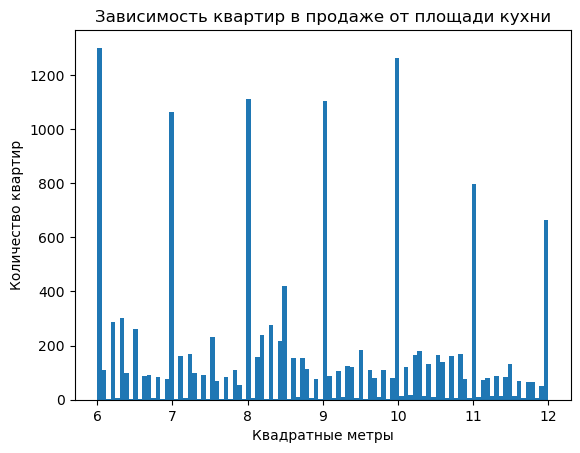

In [36]:
plt.hist(df['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

#### Вывод

Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.

### Анализ этажности

Ни для кого не секрет, что объекты часто рассматриваются по 3 категориям в засимости от этажа: первый, последний, все остальные.
Давайте так же классифицируем наши объекты

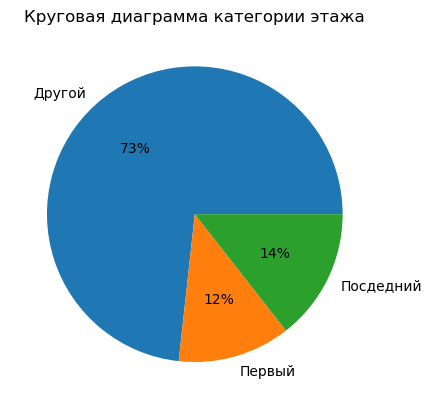

In [37]:
df['floor_category'] = np.where(df['floor'] == 1, 'Первый',
                       np.where(df['floor'] == df['floors_total'],'Посдедний','Другой'))
df.groupby('floor_category').size().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Круговая диаграмма категории этажа')
plt.show()

#### Вывод
Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди хотят сьехать с этих этажей.

### Анализ цены

In [ ]:
df['last_price'].describe()

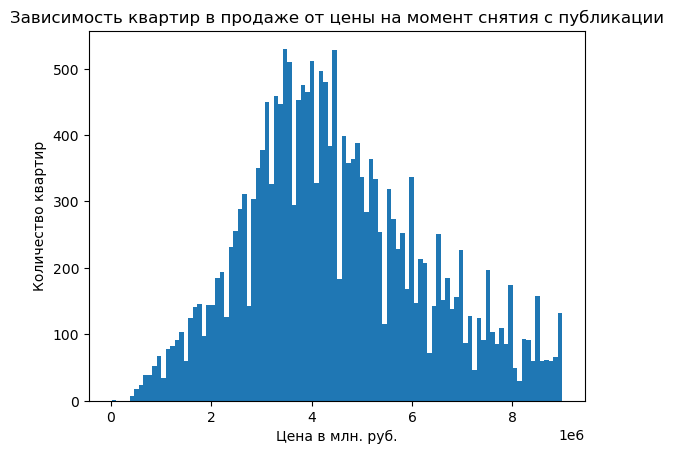

In [38]:
plt.hist(df['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

#### Вывод:
Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.

### Анализ комнатности

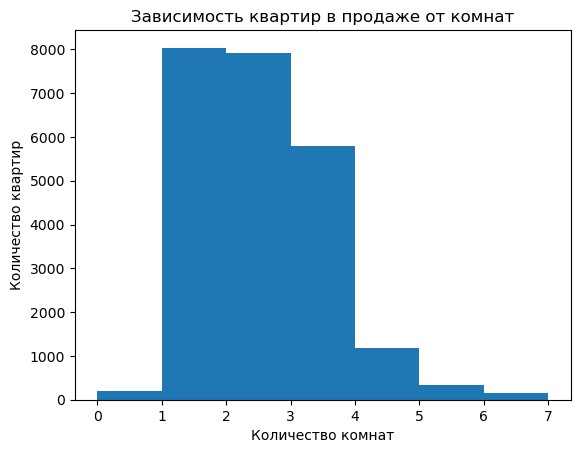

In [39]:
plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

#### Вывод:
Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.

### Анализ высоты потолков

In [ ]:
df['ceiling_height'].describe()

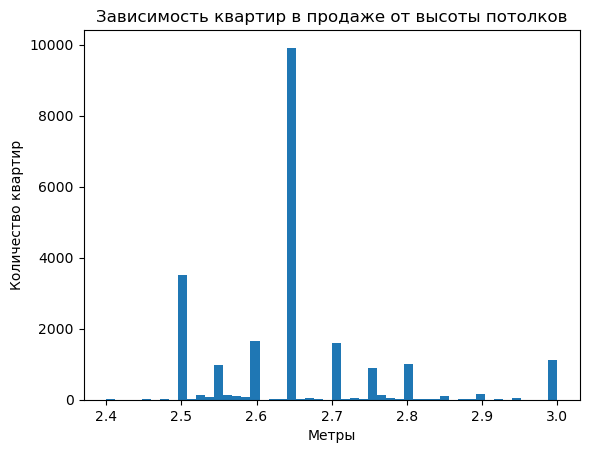

In [40]:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

#### Вывод
Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.

### Анализ размещений объявлений

Построим график распределения частоты объявлений по годам, месяцам и нееделям

In [41]:
def hist_df(data):
    for column,name in zip(['year','week_day','month'],['Годы','День недели','Месяц']):
        data.plot(y = column, kind = 'hist', bins = 40, figsize = (8,4))
        plt.title(name)
    return plt.show()

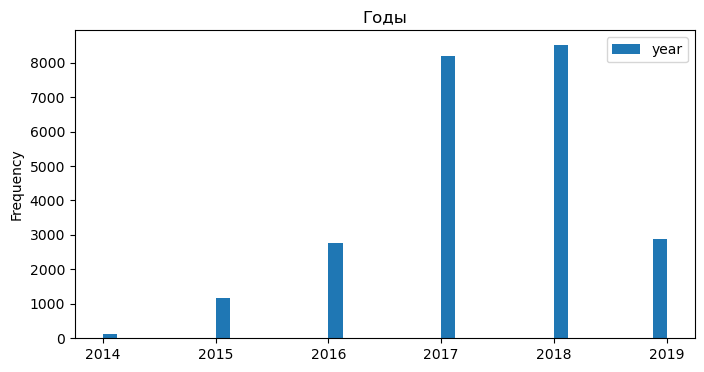

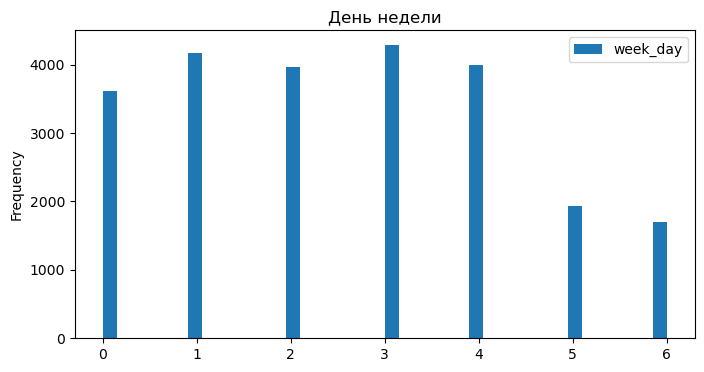

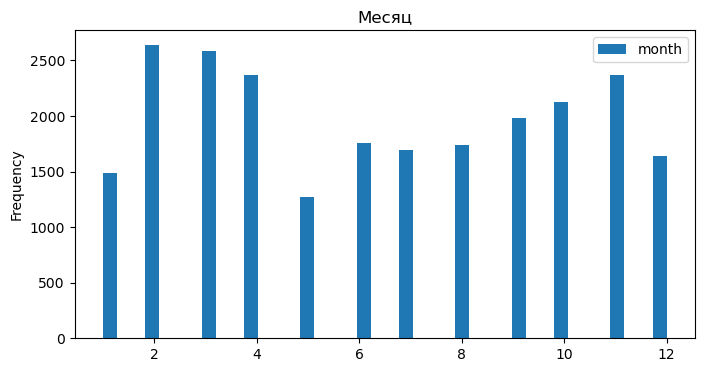

In [42]:
for column,name in zip(['year','week_day','month'],['Годы','День недели','Месяц']):
    df.plot(y = column, kind = 'hist', bins = 40, figsize = (8,4))
    plt.title(name)
    plt.show()

### Вывод

* Годы отличаются явно сезонностью в 2017 и 2018 гг. Возможно, что данные за 2019 год неполный, а ранее сервис Я.Недвижимость еще не существовал
* В днях недели также выявлена явная сезонность: в выходные дни реже происходят размещения и продажи недвижимости
* В месяцах также заметна сезонность: в январе и мае (традиционно праздничные месяцы в России) сделок и объявлений меньше, чем в другие сезоны. Пик сделок приходится на конец зимы - начало весны и осень. Лето также традиционно "не сезон" на рынке недвижимости.

### Корреляционный анализ

Давайте посмотрим на то, как связаны между собой различные ключевые показатели квартир

In [43]:
df_piter['city_centers_nearest'].corr(df_piter['price_on_metr'])

-0.3135372459979526

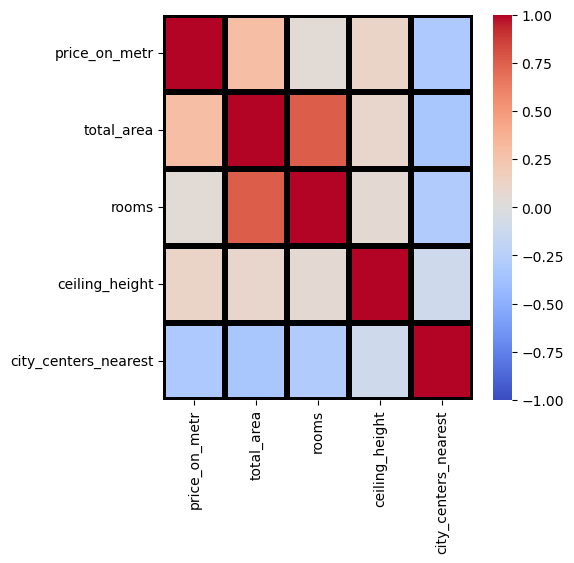

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(df_piter[['price_on_metr','total_area','rooms','ceiling_height', 'city_centers_nearest']]\
               .corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

#### Вывод
Существует сильная прямая связь между числом комнат и общей площадью квартир
Существует сильная обратная связь между ценой за квадратный метр и удаленностью от центра города

### Анализ зависимости цены квадратного метра от удаленности от города

C:\Users\nurla\AppData\Local\Temp\ipykernel_10388\2365384285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piter['km_center'] = (df_piter['city_centers_nearest']).round()


<Axes: >

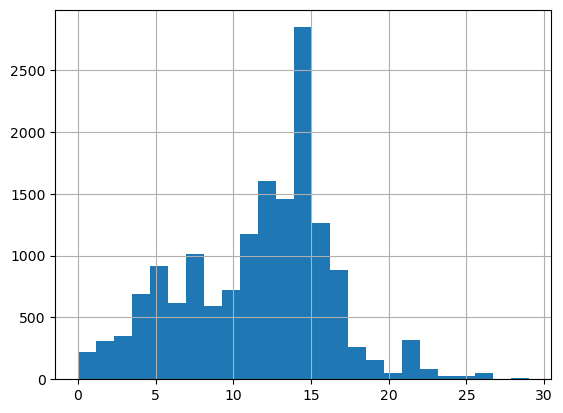

In [45]:
df_piter['km_center'] = (df_piter['city_centers_nearest']).round()
df_piter['km_center'].hist(bins = 25)

In [ ]:
df_piter.groupby('km_center')['price_on_metr'].mean().plot(figsize=(10,4), style='o-', grid = True)
plt.title('Зависимость цены от удаленности от центра')
plt.show()

#### Вывод:
Для поиска оптимального соотношения "цена-расстояние" следует обратить внимание на объекты в пределах 2-4 или 7-10 км от центра города

### Выводы по всему разделу:
* На рынке самое большое предложение квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.
* Больше всего продают квартир с жилой площадью около 18 кв. м и 30 кв. метров при этом прослеживается спад предложений в средней зоне 23 кв. метра.
* Прослеживается тенденция что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, при этом в анкетах заметны явные всплески на целых числах.
* Из гисторгаммы следует, что наиболее часто цена объекта составляет 3,8 - 4,2 миллниона.
* Среди предложений больше всего однокомнатных квартир. С увеличением комнат количество предложений снижается почти линейно.
* Среди большинства предложений высота составляет 2.65 метров, далее 2.5, 2.6, 2.7, 2.55 метров.
* Менее ценными считаются квартиры на "первом" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества, значит люди хотят сьехать с этих этажей.
* Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
* Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров), и значительным всплеском на расстоянии в 5000 метров от центра города.

### Опциональные возможности

In [46]:
q = """ select * from df_piter """
sqldf(q)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,floor,kitchen_area,balcony,locality_name,days_exposition,city_centers_nearest,week_day,year,month,price_on_metr,km_center
0,13000000.0,108.00,2019-03-07 00:00:00.000000,3,2.70,16,8,25.00,0.0,Санкт-Петербург,NaN,16.028,3,2019,3,120370,16.0
1,5196000.0,56.00,2015-08-20 00:00:00.000000,2,2.65,5,4,8.30,0.0,Санкт-Петербург,558.0,13.933,3,2015,8,92785,14.0
2,64900000.0,159.00,2015-07-24 00:00:00.000000,3,2.65,14,9,NaN,0.0,Санкт-Петербург,424.0,6.800,4,2015,7,408176,7.0
3,10000000.0,100.00,2018-06-19 00:00:00.000000,2,3.03,14,13,41.00,0.0,Санкт-Петербург,121.0,8.098,1,2018,6,100000,8.0
4,7915000.0,71.60,2019-04-18 00:00:00.000000,2,2.65,24,22,18.90,2.0,Санкт-Петербург,NaN,11.634,3,2019,4,110544,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,3550000.0,35.30,2018-02-28 00:00:00.000000,1,2.86,15,4,9.10,2.0,Санкт-Петербург,29.0,16.081,2,2018,2,100566,16.0
15717,5500000.0,52.00,2018-07-19 00:00:00.000000,2,2.65,5,2,6.00,0.0,Санкт-Петербург,15.0,6.263,3,2018,7,105769,6.0
15718,9470000.0,72.90,2016-10-13 00:00:00.000000,2,2.75,25,7,10.60,1.0,Санкт-Петербург,519.0,4.489,3,2016,10,129903,4.0
15719,9700000.0,133.81,2017-03-21 00:00:00.000000,3,3.70,5,3,13.83,0.0,Санкт-Петербург,NaN,4.232,1,2017,3,72490,4.0


In [ ]:
df_days.query('price_on_metr <= price_on_metr.quantile(.99)').plot(y = 'days_exposition', x = 'price_on_metr', kind = 'scatter')
plt.show()

#### st.ttest_1samp - проверка двусторонней гипотезы Т - тест
#### st.ttest_ind - равенство двух средних ген совокупностей (независимые выборки)
#### st.ttest_rel - равенство двух средних ген совокупностей (зависимые выборки)
#### np.random.normal - нормальное распределение 

In [ ]:
alfa = 0.05
result = st.ttest_1samp(df_piter['price_on_metr'], 114.85)[1]
print(f'P-value = {result}')
if result > alfa:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

In [ ]:
alfa = 0.05
result = st.ttest_ind(df_piter['price_on_metr'], df_len_obl['price_on_metr'])[1]
print(f'P-value = {result}')
if result > alfa:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

In [ ]:
norm_1 = pd.DataFrame(data = np.random.normal(181, 10, 900), columns = ['A']).plot(kind = 'hist')
norm_2 = pd.DataFrame(data = np.random.normal(179.9, 23, 900), columns = ['B']).plot(kind = 'hist')

In [ ]:
alfa = 0.05
result = st.ttest_ind(norm_1['A'], norm_2['B'])[1]
print(f'P-value = {result}')
if result > alfa:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

In [ ]:
#st.ttest_rel(norm_1['A'], norm_2['B'])
alfa = 0.05
result = st.ttest_ind(norm_1['A'], norm_2['B'])[1]
print(f'P-value = {result}')
if result > alfa:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

In [ ]:
df_len_obl['price_on_metr'] = df_len_obl['price_on_metr'] / 1000
df_piter['price_on_metr'] = df_piter['price_on_metr'] / 1000

In [ ]:
df_len_obl['price_on_metr'].plot(kind = 'kde', xlim = (0,250))
df_piter['price_on_metr'].plot(kind = 'kde', xlim = (0,250))
plt.legend(['Len_obl','Piter'])
plt.show()

In [ ]:
result = st.ttest_1samp(df_piter['price_on_metr'], 114.7)
alpha = 0.05
print(f'P-value = {result[1].round(4)}')

if result[1] > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')